<a href="https://colab.research.google.com/github/CamiloE/Proyectos-Personales/blob/master/Precios_de_las_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerias importantes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Importar base de datos
dataframe =  pd.read_csv("https://raw.githubusercontent.com/StephanieStallworth/Exploratory_Data_Analysis_Visualization_Python/master/Melbourne_housing_extra_data.csv")
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019


In [3]:
dataframe.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
dtype: object

In [4]:
dataframe.Type.unique()#Conocer los valores de la variable categorica Type

array(['h', 'u', 't'], dtype=object)

In [5]:
dic={'h':0,'u':1,'t':2}
dataframe['ntype']=dataframe['Type'].map(dic)#codifcacion numerica
dataframe['ntype']

0        0
1        0
2        0
3        1
4        0
        ..
17402    0
17403    0
17404    0
17405    1
17406    0
Name: ntype, Length: 17407, dtype: int64

In [6]:
dataframe['Method'].unique()

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17407 entries, 0 to 17406
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         17407 non-null  object 
 1   Address        17407 non-null  object 
 2   Rooms          17407 non-null  int64  
 3   Type           17407 non-null  object 
 4   Price          13525 non-null  float64
 5   Method         17407 non-null  object 
 6   SellerG        17407 non-null  object 
 7   Date           17407 non-null  object 
 8   Distance       17407 non-null  float64
 9   Postcode       17407 non-null  int64  
 10  Bedroom2       13625 non-null  float64
 11  Bathroom       13625 non-null  float64
 12  Car            13625 non-null  float64
 13  Landsize       13603 non-null  float64
 14  BuildingArea   7323 non-null   float64
 15  YearBuilt      8429 non-null   float64
 16  CouncilArea    13601 non-null  object 
 17  Lattitude      13737 non-null  float64
 18  Longti

In [8]:
dataframe.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,ntype
count,17407.000000,1.352500e+04,17407.000000,17407.000000,13625.000000,13625.000000,13625.000000,13603.000000,7323.000000,8429.000000,13737.000000,13737.000000,17407.000000,17407.000000
mean,2.934624,1.071537e+06,9.378962,3103.327742,2.887193,1.545688,1.566826,497.656546,149.330926,1961.673152,-37.812157,144.995283,7486.500603,0.452232
std,0.983128,6.553000e+05,4.897268,76.005061,1.010500,0.716583,0.968356,1361.160059,145.204928,38.633785,0.068399,0.087676,4410.324671,0.679641
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431620,389.000000,0.000000
25%,2.000000,6.400000e+05,5.900000,3046.000000,2.000000,1.000000,1.000000,158.000000,92.000000,1930.000000,-37.856000,144.941200,4442.000000,0.000000
50%,3.000000,8.910000e+05,9.200000,3101.000000,3.000000,1.000000,1.000000,385.000000,127.000000,1966.000000,-37.809400,145.000200,6567.000000,0.000000
75%,4.000000,1.321000e+06,12.000000,3147.000000,3.000000,2.000000,2.000000,643.000000,179.000000,1998.000000,-37.763400,145.052250,10331.000000,1.000000
max,12.000000,8.000000e+06,47.400000,3978.000000,30.000000,12.000000,26.000000,76000.000000,6791.000000,2106.000000,-37.414950,145.526350,21650.000000,2.000000


In [9]:
dataframe['Date']=pd.to_datetime(dataframe.Date,yearfirst=True)#Convierte la columna a formato fecha
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,ntype
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019,0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019,1
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,0


In [10]:
(dataframe.isna().sum()/len(dataframe))*100#Conocer el porcentaje de valores nulos por columnas

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            22.301373
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2         21.726891
Bathroom         21.726891
Car              21.726891
Landsize         21.853277
BuildingArea     57.930718
YearBuilt        51.576952
CouncilArea      21.864767
Lattitude        21.083472
Longtitude       21.083472
Regionname        0.000000
Propertycount     0.000000
ntype             0.000000
dtype: float64

In [11]:
df2=dataframe.dropna()#Eliminar las filas con valores nulos
df2.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
ntype            0
dtype: int64

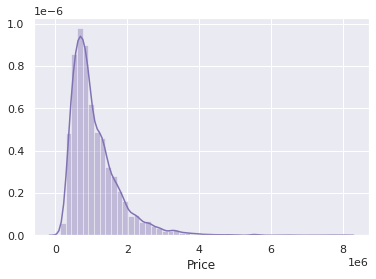

In [12]:
sns.distplot(df2['Price'],vertical=False,color='m')#Conocer la distribucion de la variable objetivo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


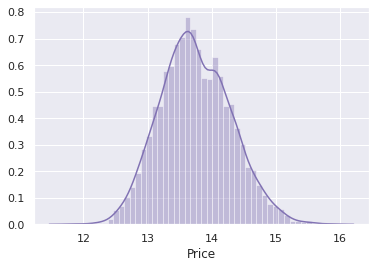

In [13]:
  '''Hay que aplicar normalizacion a esa variable ojetivo'''
  df2['Price']=np.log(df2['Price'])
  sns.distplot(df2['Price'],vertical=False,color='m')

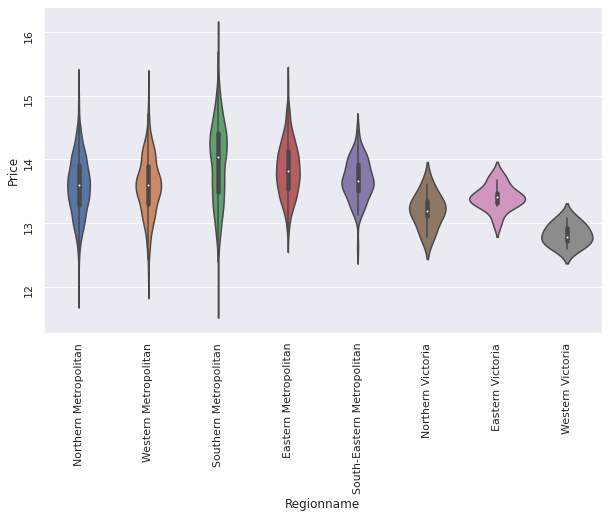

In [14]:
#Conocer la relacion existente entre la region y el precio
fig, ax=plt.subplots(figsize=(10,6))
sns.violinplot(data=df2,x='Regionname',y='Price',ax=ax)
ax.tick_params(labelrotation=90)

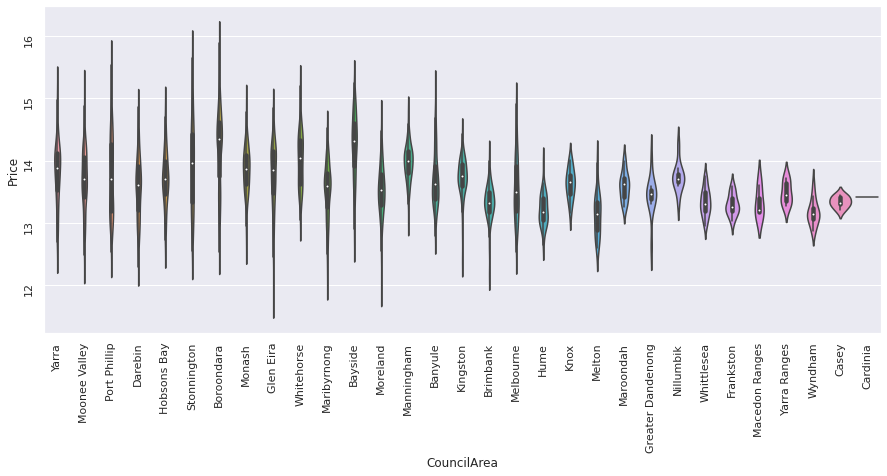

In [15]:
fig, ax=plt.subplots(figsize=(15,6))
sns.violinplot(data=df2,x='CouncilArea',y='Price',ax=ax)#Conocer la relacion existente entre El council area y el precio
ax.tick_params(labelrotation=90)

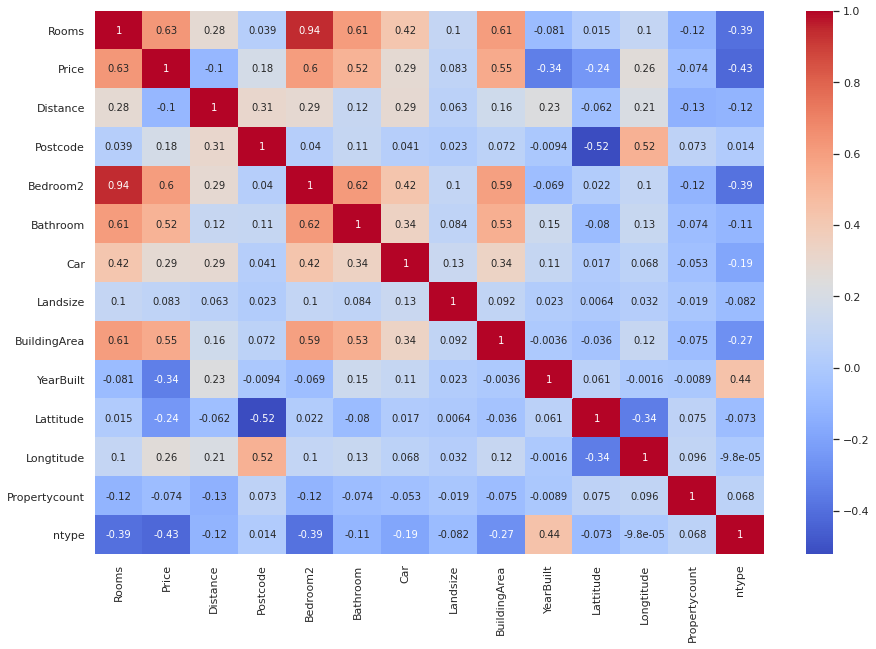

In [16]:
corr=df2.corr()
fig, ax= plt.subplots(figsize=(15,10))#Hallar correlacion entre las variables numericas
sns.heatmap(data=corr,annot=True,cmap='coolwarm')

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['Regionname']=le.fit_transform(df2['Regionname'])
df2['CouncilArea']=le.fit_transform(df2['CouncilArea'])#Transforma las variables categoricas
df2.drop(axis='columns',columns=['Suburb','Address','Type','Method','SellerG','Date','Bedroom2'],inplace=True)#Eliminar columnas que no se necesitan
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,ntype
2,2,13.849912,2.5,3067,1.0,0.0,156.0,79.0,1900.0,29,-37.8079,144.9934,2,4019,0
4,3,14.197366,2.5,3067,2.0,0.0,134.0,150.0,1900.0,29,-37.8093,144.9944,2,4019,0
6,4,14.285514,2.5,3067,1.0,2.0,120.0,142.0,2014.0,29,-37.8072,144.9941,2,4019,0
11,3,14.444652,2.5,3067,2.0,0.0,245.0,210.0,1910.0,29,-37.8024,144.9993,2,4019,0
14,2,14.307765,2.5,3067,1.0,2.0,256.0,107.0,1890.0,29,-37.8060,144.9954,2,4019,0


In [18]:
datos= df2.iloc[0:300]#Tomar solo 300 muestras para el train y el test
datos.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,ntype
2,2,13.849912,2.5,3067,1.0,0.0,156.0,79.0,1900.0,29,-37.8079,144.9934,2,4019,0
4,3,14.197366,2.5,3067,2.0,0.0,134.0,150.0,1900.0,29,-37.8093,144.9944,2,4019,0
6,4,14.285514,2.5,3067,1.0,2.0,120.0,142.0,2014.0,29,-37.8072,144.9941,2,4019,0
11,3,14.444652,2.5,3067,2.0,0.0,245.0,210.0,1910.0,29,-37.8024,144.9993,2,4019,0
14,2,14.307765,2.5,3067,1.0,2.0,256.0,107.0,1890.0,29,-37.8060,144.9954,2,4019,0


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=datos.drop(axis='columns',columns=['Price'])#Separar las caracteristicas de la variable objetivo
y=datos[['Price']]#Separar la variable objetivo
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)#Separacion de los datos de entrenamiento y test

In [20]:
from sklearn.pipeline import Pipeline
model=Pipeline([('ss',StandardScaler()),
                ('lr',LinearRegression())])#Modelo que normaliza los datos y aplica regression lineal

In [22]:
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [26]:
print(f'El puntae r2 obtenido es{model.score(X_test,y_test):.3f}')

El puntae r2 obtenido es0.718


In [27]:
model['lr'].intercept_, model['lr'].coef_#Intercepto y coeficientes obtenidos

(array([13.86746917]),
 array([[ 0.14014568,  0.08611876,  0.43286272,  0.05258194,  0.04289019,
          0.01493224,  0.15881374, -0.11661448, -0.03329628,  0.09180891,
         -0.08433651, -0.23218131,  0.26041145, -0.06055189]]))

In [28]:
from sklearn import metrics
y_pred=model.predict(X_test)
error=metrics.mean_squared_error(y_test,y_pred)
print(f'El error cuadratico medio obtenido es {error:.3f}')

El error cuadratico medio obtenido es 0.078


Polinomial

In [29]:
from sklearn.preprocessing import PolynomialFeatures
modelo2=Pipeline([('pol',PolynomialFeatures(2)),
                  ('ss',StandardScaler()),
                  ('lr', LinearRegression())])#Modelo polinomial para lograr mejorar el puntaje

In [30]:
modelo2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('pol',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [31]:
print(f'El puntae r2 obtenido con la transformacion polinomial de segundo grado es {modelo2.score(X_test,y_test):.3f}')

El puntae r2 obtenido con la transformacion polinomial de segundo grado es 0.715


In [32]:
y_pred=modelo2.predict(X_test)
error=metrics.mean_squared_error(y_test,y_pred)
print(f'El error cuadratico medio obtenido en este modelo es {error:.3f}')

El error cuadratico medio obtenido en este modelo es 0.079


## Modelo aplicando gradiente estocastico SGD

In [33]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=100)
modelo3=Pipeline([('ss',StandardScaler()),
                  ('sgd', sgd)])

In [34]:
modelo3.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgd',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=100,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [35]:
print(f'El puntaje obtenido con el modelo SGD es {modelo3.score(X_test,y_test):.3f}')

El puntaje obtenido con el modelo SGD es 0.700


In [36]:
modelo3.get_params()

{'memory': None,
 'sgd': SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.01, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='squared_loss', max_iter=100,
              n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False),
 'sgd__alpha': 0.0001,
 'sgd__average': False,
 'sgd__early_stopping': False,
 'sgd__epsilon': 0.1,
 'sgd__eta0': 0.01,
 'sgd__fit_intercept': True,
 'sgd__l1_ratio': 0.15,
 'sgd__learning_rate': 'invscaling',
 'sgd__loss': 'squared_loss',
 'sgd__max_iter': 100,
 'sgd__n_iter_no_change': 5,
 'sgd__penalty': 'l2',
 'sgd__power_t': 0.25,
 'sgd__random_state': None,
 'sgd__shuffle': True,
 'sgd__tol': 0.001,
 'sgd__validation_fraction': 0.1,
 'sgd__verbose': 0,
 'sgd__warm_start': False,
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True),
 'ss__copy': True

In [37]:
y_pred=modelo3.predict(X_test)
mse=metrics.mean_squared_error(y_test,y_pred)
print(f'El error cuadratico medio obtenido en este modelo es {mse:.3f}')

El error cuadratico medio obtenido en este modelo es 0.083


## Modelo Regularizado Ridge

In [38]:
from sklearn.linear_model import Ridge
modelo4=Pipeline([('ss',StandardScaler()),
                  ('ridge', Ridge())])
modelo4.get_params()

{'memory': None,
 'ridge': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__normalize': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.001,
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'steps': [('ss', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
         normalize=False, random_state=None, solver='auto', tol=0.001))],
 'verbose': False}

In [39]:
modelo4.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [40]:
modelo4.score(X_test,y_test)

0.7182723813180515

In [41]:
y_pred=modelo4.predict(X_train)